In [366]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.dates as mdates
%matplotlib inline

In [419]:
def imabs(complexNum):
    return 2*abs(complexNum)/float(16)

def imarg(complexNum):
    return math.atan2(complexNum.imag,complexNum.real)

def sine_wave(time,amp,freq,phi):
    time = float(time)
    amp = float(amp)
    freq = float(freq)
    phi = float(phi)
    return amp*np.sin(math.pi*2*freq*time-phi)

def cos_wave(time,amp,freq,phi):
    time = float(time)
    amp = float(amp)
    freq = float(freq)
    phi = float(phi)
    x=amp*np.cos(math.pi*2*freq*time+phi)
    return x

In [420]:
def calc_resid(obs,pred):
    return obs-pred

In [421]:
math.pi

3.141592653589793

In [422]:
time = np.arange(16)
time

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [423]:
y_t=[]

for i in time:
    y_t.append(sine_wave(i,2,1/float(8),1)+sine_wave(i,3,1/float(16),-1.5))
y_t

[1.3095429901963702,
 2.4199886407900202,
 3.3466672843623924,
 3.2953549019445196,
 1.8951535746189021,
 -0.52319962697949141,
 -3.0465547544740335,
 -4.6376082681269741,
 -4.6754269294279567,
 -3.2718223014272052,
 -1.1854580608898344,
 0.61289015365338084,
 1.4707303646126841,
 1.3750332876166766,
 0.88534553100147528,
 0.72936321252907232]

In [424]:
fft = {'fft': np.fft.fft(y_t)}
waveDF = pd.DataFrame(fft)

In [425]:
wave = np.arange(9)
b = np.array([-7,-6,-5,-4,-3,-2,-1])
waveDF['k'] = np.concatenate([wave,b])

In [426]:
waveDF['freq'] = waveDF['k']/float(16)
imabs(waveDF['fft'])
2*abs(waveDF['fft'][1])/16

3.0

In [427]:
x = np.complex(23.9398796784973,-1.69769284002489)
imarg(x)
y=np.complex(-13.4635357569264,-8.64483689389023)
imarg(y)

-2.570796326794899

In [428]:
waveDF['peakAmp']= waveDF.apply(lambda row: imabs(row['fft']), axis=1)

In [429]:
waveDF['peakAmp'][0] = 0
waveDF['peakAmp'][7] = abs(waveDF['fft'][7])

In [430]:
waveDF['phase'] = waveDF['peakAmp']

In [431]:
for i in np.arange(len(waveDF)):
    waveDF['phase'][i]= imarg(waveDF['fft'][i])

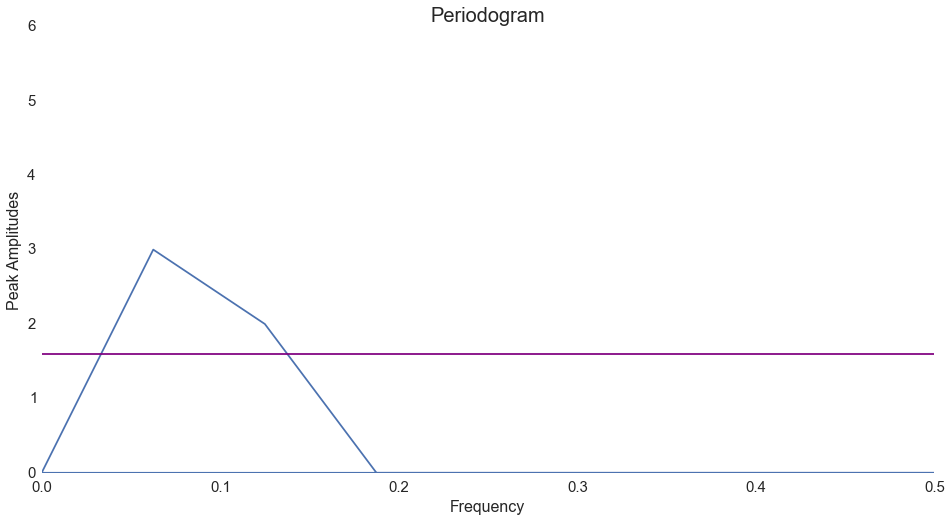

In [432]:
figure = plt.figure(figsize = (16,8))
plt.plot(waveDF['freq'], waveDF['peakAmp'])
plt.ylim(0,6)
plt.xlim(0,.5)
plt.axhline(1.6,0, color='purple')
plt.ylabel('Peak Amplitudes', fontsize = 16)
plt.xlabel('Frequency', fontsize = 16)
plt.tick_params(axis='both', labelsize=15)
plt.title('Periodogram', fontsize = 20);

In [433]:
waveDF['time'] = np.arange(16)

In [434]:
indices = [1,2]
k=1

for j in range(len(indices)):
    amp = waveDF['peakAmp'][indices[j]]
    freq = waveDF['freq'][indices[j]]
    phi = waveDF['phase'][indices[j]]
    damp=0
    
    waveDF['SineValues%d' %int(k)]= waveDF.apply(lambda row: cos_wave(row['time'],amp,freq,phi),axis=1)
    k+=1

C:\Users\flunk_000\Anaconda2\lib\site-packages\IPython\kernel\__main__.py:15: ComplexWarning: Casting complex values to real discards the imaginary part


In [435]:
interval1 = waveDF.copy()
del interval1['fft']
del interval1['k']
del interval1['freq']
del interval1['peakAmp']
del interval1['phase']
del interval1['time']

In [436]:
waveDF['byDay'] = interval1.sum(axis=1);

In [437]:
waveDF

,fft,k,freq,peakAmp,phase,time,SineValues1,SineValues2,byDay
0,(-1.55431223448e-15+0j),0,0.0000,0.000000e+00,3.141593,0,2.992485,-1.682942,1.309543
1,(23.9398796785-1.69769284002j),1,0.0625,3.000000e+00,-0.070796,1,2.845905,-0.425917,2.419989
2,(-13.4635357569-8.64483689389j),2,0.1250,2.000000e+00,-2.570796,2,2.266063,1.080605,3.346667
3,(6.66133814775e-15+6.88338275268e-15j),3,0.1875,1.197356e-15,0.801790,3,1.341232,1.954123,3.295355
4,(-4.4408920985e-16-1.55431223448e-15j),4,0.2500,2.020636e-16,-1.849096,4,0.212212,1.682942,1.895154
5,(4.21884749358e-15+1.55431223448e-15j),5,0.3125,5.620076e-16,0.352990,5,-0.949116,0.425917,-0.523200
6,(-4.4408920985e-15-6.2172489379e-15j),6,0.3750,9.550500e-16,-2.191046,6,-1.965950,-1.080605,-3.046555
7,6.43929354283e-15j,7,0.4375,6.439294e-15,1.570796,7,-2.683486,-1.954123,-4.637608
8,(6.66133814775e-16+0j),8,0.5000,8.326673e-17,0.000000,8,-2.992485,-1.682942,-4.675427
9,5.3290705182e-15j,-7,-0.4375,6.661338e-16,1.570796,9,-2.845905,-0.425917,-3.271822


In [438]:
waveDF['byDay']

0     1.309543
1     2.419989
2     3.346667
3     3.295355
4     1.895154
5    -0.523200
6    -3.046555
7    -4.637608
8    -4.675427
9    -3.271822
10   -1.185458
11    0.612890
12    1.470730
13    1.375033
14    0.885346
15    0.729363
Name: byDay, dtype: float64

In [439]:
byDay = pd.Series(waveDF['byDay'],index = waveDF['time'])

In [440]:
byDay[0:] = waveDF['byDay']

In [441]:
y_ts = pd.Series(y_t, index=waveDF['time'])

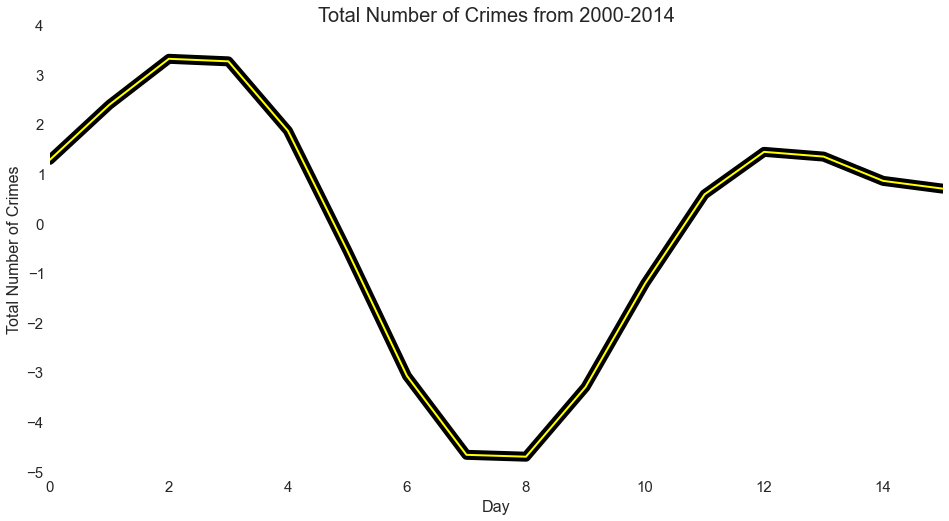

In [442]:
figure = plt.figure(figsize=(16,8))
TSPlot = byDay.plot(linewidth=10, c='black')
y_tsplot = y_ts.plot(linewidth =2, c='yellow')

TSPlot.set_ylabel('Total Number of Crimes', fontsize=16)
TSPlot.set_xlabel('Day',fontsize=16)
TSPlot.set_title('Total Number of Crimes from 2000-2014',fontsize=20)
plt.tick_params(axis='both', labelsize=15)